<a href="https://colab.research.google.com/github/eduardosoros/projetosDSNP/blob/master/PROJETO_II_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Analisando a Violência no Rio de Janeiro

Esse projeto objetiva analisar alguns indicadores de violência do Estado do Rio de Janeiro do período de 1991 a 2019.

## Obtenção dos Dados


* Os dados foram retirados da base de dados da Polícia Militar do Rio de Janeiro sobre a violência e foram pré processados e posto no repositóro.
  * O arquivo `csv` encontra-se no endereço abaixo:
    * https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv

### Importando os dados

Os dados foram importados usando o comando: `df = pd.read_csv("endereço_do_csv")`

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')

## Análise Inicial dos Dados

Breve contextualização...

#### **Tamanho DataFrame:**
   Usando os códigos a seguir, extraimos o número de linhas e colunas do nosso conjunto de dados.

In [0]:
print('Nossa base de dados é composta por:')
print('Número de linhas: ',df.shape[0])
print('Número de colunas: ',df.shape[1])

Nossa base de dados é composta por:
Número de linhas:  344
Número de colunas:  56


#### **Agora vamos extrair e mostrar todas as 56 colunas do dataset**

In [0]:
#Esse comando abaixo nos mostra uma lista com todas as colunas do data frame.
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

#### **Extraindo o tipo de cada variável:**

In [0]:
# O .dtype além de nos mostrar todas as variáveis, também nos diz qual o tipo de cada.
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

#### **Visualização das 5 primeiras linhas e de todas as colunas**

In [0]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


#### **Identificando o percentual de valores ausentes das colunas**
  * Notamos que apesar de ser um dataset com muitas variáveis, porém com várias delas não conseguiremos trabalhar, por apresetarem um grande números de dados ausentes.

In [0]:
# Começamos identificando as colunas com dados ausentes e pedindo o somatório delas,
# após isso, aplicamos o método sort para nos trazer os valores de Z a A, com isso
# dividimos pelo número total de linhas e multiplicamos por 100.
round(df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100)

roubo_bicicleta               80.0
furto_bicicleta               80.0
apreensao_drogas_sem_autor    52.0
posse_drogas                  52.0
apf                           52.0
aaapai                        52.0
cmp                           52.0
trafico_drogas                52.0
cmba                          52.0
sequestro_relampago           42.0
furto_coletivo                42.0
extorsao                      42.0
furto_celular                 42.0
roubo_apos_saque              42.0
roubo_conducao_saque          42.0
roubo_cx_eletronico           42.0
estupro                       42.0
estelionato                   42.0
pol_civis_mortos_serv         42.0
pol_militares_mortos_serv     42.0
pessoas_desaparecidas         38.0
encontro_ossada               38.0
roubo_celular                 31.0
lesao_corp_culposa            28.0
ameaca                        28.0
sequestro                     28.0
lesao_corp_morte              28.0
registro_ocorrencias          28.0
hom_por_interv_polic

## Analisando algumas Informações Estatísticas da Violência no Rio de Janeiro



* **Resumo estatístico:**

In [0]:
# O comando nos mostra um resumo com alguns indicadores estatíticos, como a contagem de cada, média, desvio padrão,
# menor valor, os quartis e o maior valor. Para algumas variáveis essa análise não faz sentido.
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

#### **Média de Roubo de veículos por ano:**
  * De 1991 a 2019, temos uma média de 2.449 roubos de veículos por ano.

In [0]:
round(df.roubo_veiculo.mean())

2449

#### **Média de Furto de veiculos por ano:**
  * Já o furto de veículos, a média anual é de 1.675 ocorrências.

In [0]:
round(df.furto_veiculos.mean())

1675

#### **Média de veículos recuperados por ano:**
  * Com esses números de roubos/furtos de veículos acima, temos uma média de 1.772 veículos recuperados por ano.

In [0]:
round(df.recuperacao_veiculos.mean())

1772

**Percentual de carros recuperados x carros roubados e furtados:**
$\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$
  * Usando esta equação acima é fácil obtermos o percentual de veículos recuperados sobre o número de veículos roubados/furtados.

In [0]:
x = round((df.recuperacao_veiculos.sum() / (df.roubo_veiculo.sum() + df.furto_veiculos.sum()))*100,0)
print(x,"%")



43.0 %


## **Homicídios dolosos:**
  ### **Lembrando que homicídio doloso é aquele em que o indivíduo tem a intenção de matar.**
  #### **Número Máximo dessa ocorrência:**
  * Notamos que o maior número de homicídios dolosos ocorridos em um dado mês foi de 831.

In [0]:
df.hom_doloso.max()

831

#### **E quando ocorreu esse maior número?**
*Localizamos a linha, vimos que esse dado se refere a janeiro de 1995.*

In [0]:
df[df['hom_doloso'] == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


#### **Número mínimo dessa ocorrência:**
* Encontramos que o menor número foi 272 ocorrências.

In [0]:
df.hom_doloso.min()

272

#### **E quando ocorreu esse menor número?**
*Localizamos a linha em que em que ocorreu os 272 homicídios dolosos, como podemos observar, foi no período de junho de 2015.*

In [0]:
# Encontramos o menor valor da coluna homicídio doloso e logo após iremos ver a qual linha
# ele pertence, para que dessa forma consigamos identificar o período no evento.
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


#### **Analisando os homicídios dolosos por ano, vimos que existe uma tendência de queda.**

In [0]:
# Selecionando as colunas Ano e homicídio doloso, agrupamos por Ano e vemos a soma, depois plotamos 
# um gráfico de barras para identificar a tendência ao longo dos anos.
analise1 = df[['vano', 'hom_doloso']].groupby(by='vano').sum()

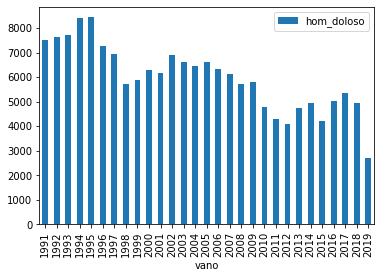

In [0]:
analise1.plot(kind='bar', );

In [0]:
analise1.min()

hom_doloso    2717
dtype: int64

## Visualização de Dados




#### **Histograma de homicídios dolosos**

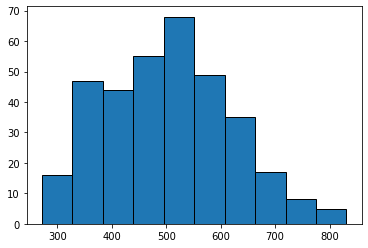

In [0]:
df.hom_doloso.hist(edgecolor='black', grid=False);

#### **Roubo em coletivos: gráfico de linhas**
 * Como podemos observar nos dois gráficos abaixo, existe uma tedência de crescimento de roubo em coletivos.

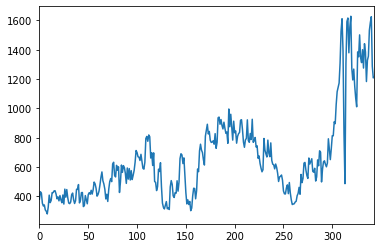

In [0]:
#Gráfico simples de linhas
df.roubo_em_coletivo.plot();

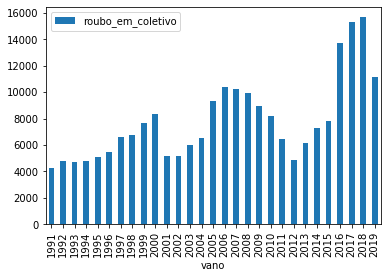

In [0]:
# Selecionando as colunas Ano e Roubo em coletivos, agrupada por ano e mostrando a soma delas.
analise2 = df[['vano', 'roubo_em_coletivo']].groupby('vano').sum()
analise2.plot(kind='bar');